## Download dataset

In [1]:
!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

## download dataset 
!kaggle competitions download -c titanic

## unzip dataset
!unzip "titanic.zip" -d "titanic_dataset"

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=41d32a141f6c45ff50b283365b449eebba497dc0f601b6a1ae8c3dcd0d5da060
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.2MB/s]
Archive:  titanic.zip
  inflating: titanic_dataset/gender_submission.csv  
  inflating: titanic_dataset/test.csv  
  inflating: titanic_dataset/train.csv  


## Importing Libraries

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
## Apply standardscaler 
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## EDA ( Exploratory Data Analysis )

In [153]:
train_data = pd.read_csv('/content/titanic_dataset/train.csv')
test_data = pd.read_csv('/content/titanic_dataset/test.csv')

print(f"Shape of train and test dataset :- {train_data.shape} & {test_data.shape}")
print(f"Sample train dataset :- \n {train_data.head()}")
print(f"Sample test Dataset :- \n {test_data.head()}")
print(f"Checking for null values or missing values in train dataset :- \n {train_data.isnull().sum()}")
print(f"Checking for null values or missing values in test dataset :- \n {test_data.isnull().sum()}")
print(f"Number of duplicate values in train data and test data :- {len(train_data.loc[train_data.duplicated()])} & {len(test_data.loc[test_data.duplicated()])}")

print(f"Dataset information :- \n ")
train_data.info()

Shape of train and test dataset :- (891, 12) & (418, 11)
Sample train dataset :- 
    PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
Sample test Dataset :- 
    PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]
Checking for null values or missing values in train dataset :- 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch       

## Visualization

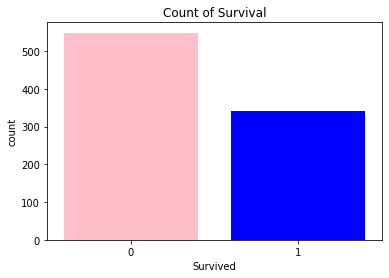

In [154]:
sns.countplot(x= 'Survived', data = train_data, palette=['pink', 'blue'], saturation=2)
plt.title("Count of Survival")
plt.show()

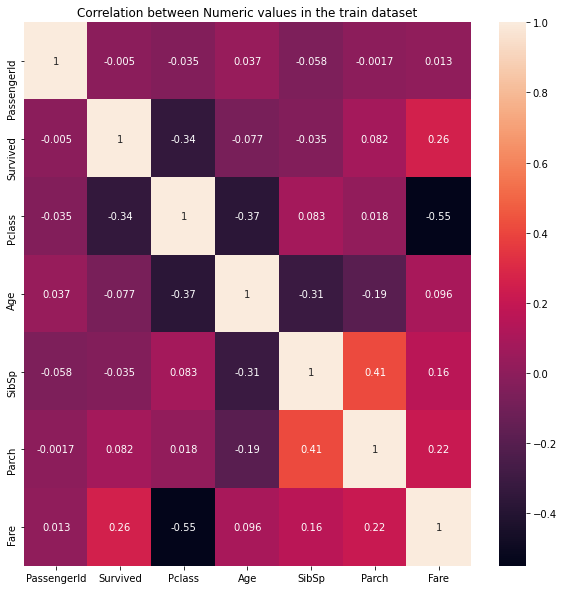

In [155]:
## Correlation between numeric values 
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True)
plt.title("Correlation between Numeric values in the train dataset")
plt.show()

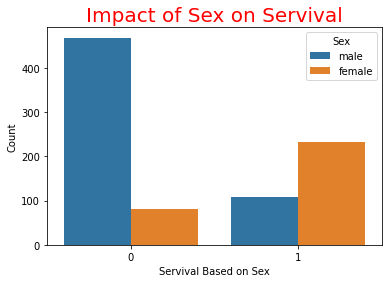

In [157]:
## impact of sex on servival
sns.countplot(x = 'Survived', data=train_data, hue='Sex')
plt.title('Impact of Sex on Servival', fontdict={'color':'Red', 'fontsize':20, 'fontweight':10})
plt.xlabel('Servival Based on Sex')
plt.ylabel('Count')
plt.show()

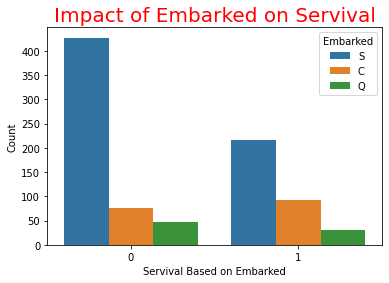

In [158]:
## impact of age on servival
sns.countplot(x = 'Survived', data=train_data, hue='Embarked')
plt.title('Impact of Embarked on Servival', fontdict={'color':'Red', 'fontsize':20, 'fontweight':10})
plt.xlabel('Servival Based on Embarked')
plt.ylabel('Count')
plt.show()

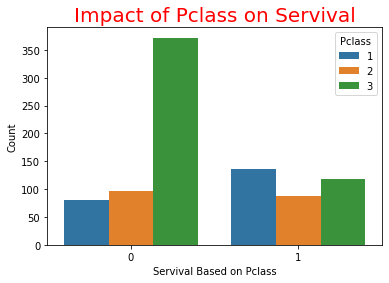

In [159]:
## impact of age on servival
sns.countplot(x = 'Survived', data=train_data, hue='Pclass')
plt.title('Impact of Pclass on Servival', fontdict={'color':'Red', 'fontsize':20, 'fontweight':10})
plt.xlabel('Servival Based on Pclass')
plt.ylabel('Count')
plt.show()

## Data Preparation

In [160]:
## missing values 
print(f"Missing values in the train dataset :- \n {train_data.isnull().sum()}")
print(f"Missing values in the test dataset :- \n {test_data.isnull().sum()}")

Missing values in the train dataset :- 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in the test dataset :- 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [161]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [162]:
np.nanmedian(train_data['Age']), np.nanmean(train_data['Age'])

(28.0, 29.69911764705882)

In [163]:
## we have missing values in Age , Cabin , Fare, Embarked

## lets replace all missing values of age with median of it
median_val = np.nanmedian(train_data['Age'])
train_data['Age'] = train_data['Age'].fillna(median_val)
test_data['Age'] = test_data['Age'].fillna(median_val)

print(f"Value counts of Cabin col :- \n {train_data['Cabin'].value_counts()}")
## next missing values column is Cabin.
## Cabin is a type of String/Object
## So we can replace nan values by any numeric value
train_data['Cabin'] = train_data['Cabin'].fillna(0)
test_data['Cabin'] = test_data['Cabin'].fillna(0)

## next Embarked 
print(f"Value counts of Embarked :- \n {train_data['Embarked'].value_counts()}")
## we can replace missing values of Embarked with 'S'
train_data['Embarked'] = train_data['Embarked'].fillna('S')


## Missing value of fare with median value of it
median_val = np.nanmedian(train_data['Fare'])
test_data['Fare'] = test_data['Fare'].fillna(median_val)

## Drop unimportant features 
## Name is not that much of important feature
## So we can drop it
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

train_data = train_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['PassengerId'], axis=1)
## Drop ticket column from train data
train_data = train_data.drop(['Ticket'], axis=1)
## Drop ticket column from test data
test_data = test_data.drop(['Ticket'], axis=1)

## Drop ticket column from train data
train_data = train_data.drop(['Cabin'], axis=1)
## Drop ticket column from test data
test_data = test_data.drop(['Cabin'], axis=1)

## apply label encodig on object classes 
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

le = LabelEncoder()
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.transform(test_data['Embarked'])

print(f"Sample Dataset After Preprocessing :- \n {train_data.head()}")

print(f"Dataset Info After Preprocessing :- \n ")
train_data.info()

Value counts of Cabin col :- 
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
C86            1
D28            1
E12            1
D45            1
B41            1
Name: Cabin, Length: 147, dtype: int64
Value counts of Embarked :- 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64
Sample Dataset After Preprocessing :- 
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2
Dataset Info After Preprocessing :- 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survive

In [179]:
## Separate dependent and independent values
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']
col_names = list(X.columns)
pipeline = Pipeline(
    [
     ('std_Sclaer', StandardScaler())
    ]
)
X = pd.DataFrame(pipeline.fit_transform(X), columns=col_names)
test_data = pd.DataFrame(pipeline.transform(test_data), columns=col_names)

print(f"Sample Dataset After applying Feature Scaling :- \n {X.head()}")

## split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Size Of The Train Dataset :- {len(X_train)}")
print(f"Size Of The Test Dataset :- {len(X_test)}")
print(f"Size Of The Validation Dataset :- {len(test_data)}")

Sample Dataset After applying Feature Scaling :- 
      Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0  0.827377  0.737695 -0.565736  0.432793 -0.473674 -0.502445  0.585954
1 -1.566107 -1.355574  0.663861  0.432793 -0.473674  0.786845 -1.942303
2  0.827377 -1.355574 -0.258337 -0.474545 -0.473674 -0.488854  0.585954
3 -1.566107 -1.355574  0.433312  0.432793 -0.473674  0.420730  0.585954
4  0.827377  0.737695  0.433312 -0.474545 -0.473674 -0.486337  0.585954
Size Of The Train Dataset :- 801
Size Of The Test Dataset :- 90
Size Of The Validation Dataset :- 418


## Building Model

In [172]:
rf_clf = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

## Apply grid search operation
gs_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
gs_clf.fit(X_train, y_train)
print(f"Best Parameters :- {gs_clf.best_params_}")

## train model with best paraeters 
rf_clf = RandomForestClassifier(random_state=42, 
                                criterion= 'entropy', 
                                max_depth= 5, 
                                max_features = 'auto', 
                                n_estimators=500)
rf_clf.fit(X_train, y_train)

Best Parameters :- {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Evaluation

In [173]:
y_predict = rf_clf.predict(X_test)

In [174]:
print(f"Accuracy :- {accuracy_score(y_test, y_predict)}")
print(f"Confusion matrix :- \n {confusion_matrix(y_test, y_predict)}")
print(classification_report(y_test, y_predict))

Accuracy :- 0.8333333333333334
Confusion matrix :- 
 [[48  6]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        54
           1       0.82      0.75      0.78        36

    accuracy                           0.83        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.83      0.83      0.83        90



In [175]:
test_data_1 = pd.read_csv('/content/titanic_dataset/test.csv')
op_rf=rf_clf.predict(test_data)
op=pd.DataFrame(test_data_1['PassengerId'])
op['Survived']=op_rf
op.to_csv("titanic_submission.csv", index=False)

In [176]:
!kaggle competitions submit -c titanic -f titanic_submission.csv -m "submissin at 4.23 PM"

100% 2.77k/2.77k [00:04<00:00, 599B/s]
Successfully submitted to Titanic - Machine Learning from Disaster